In [5]:
!pip install matplotlib

J'ai du ajouter la conversion de chaînes de caractères en listes de tokens pour que se fasse le calcul de longueur de document. 

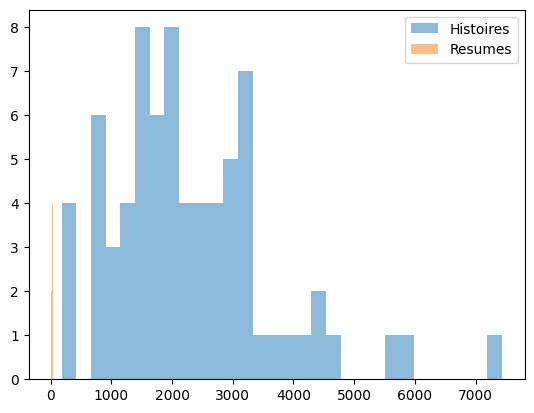

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Chargement du DataFrame
df = pd.read_csv('../data/histoires_resumes_annotes.csv')

# Convertir les chaînes de caractères en listes de tokens
df['h_tokens'] = df['h_annot'].apply(lambda x: x.split())
df['r_tokens'] = df['r_annot'].apply(lambda x: x.split())

# Création d'un histogramme des longueurs de document
histoires_lengths = df['h_tokens'].apply(len)
resumes_lengths = df['r_tokens'].apply(len)

plt.hist(histoires_lengths, bins=30, alpha=0.5, label='Histoires')
plt.hist(resumes_lengths, bins=30, alpha=0.5, label='Resumes')
plt.legend(loc='upper right')

# si le dossier n'existe pas alors il se crée
if not os.path.exists('../figures'):
    os.makedirs('../figures')

# enregistrement graphique
plt.savefig('../figures/taille_documents.png')

plt.show()

Visualisation des différents tags POS utilisés dans les histoires et les résumés.

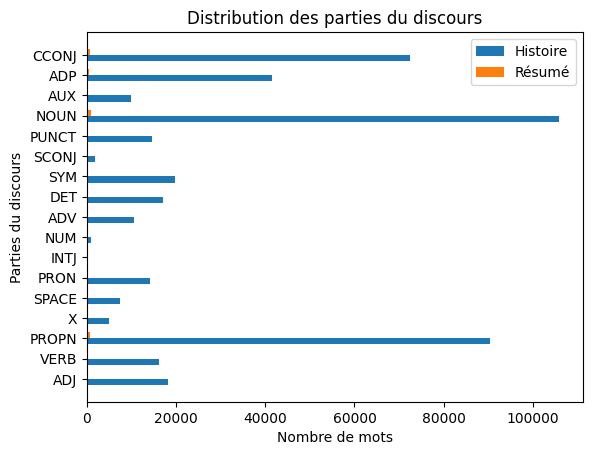

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import spacy

# Charger le modèle spaCy
nlp = spacy.load("fr_core_news_sm")

# Charger le fichier CSV
df = pd.read_csv('../data/histoires_resumes_annotes.csv')

# Fonction pour extraire les parties du discours
def get_pos_distribution(text):
    doc = nlp(text)
    pos_counts = Counter([token.pos_ for token in doc])
    return pos_counts

# Appliquer la fonction sur les histoires et les résumés
df['h_pos'] = df['h_annot'].apply(get_pos_distribution)
df['r_pos'] = df['r_annot'].apply(get_pos_distribution)

# Somme des distributions
histoire_pos_total = sum(df['h_pos'], Counter())
resumes_pos_total = sum(df['r_pos'], Counter())

# Récupération de tous les POS qui apparaissent dans les 2 colonnes
all_pos_tags = set(histoire_pos_total.keys()).union(set(resumes_pos_total.keys()))

# comptage
histoire_counts = [histoire_pos_total.get(pos, 0) for pos in all_pos_tags]
resumes_counts = [resumes_pos_total.get(pos, 0) for pos in all_pos_tags]

# résultat
y = range(len(all_pos_tags))

# définition de la largeur des barres
width = 0.3

fig, ax = plt.subplots()
ax.barh(y, histoire_counts, width, label='Histoire')
ax.barh([p + width for p in y], resumes_counts, width, label='Résumé')

ax.set_ylabel('Parties du discours')
ax.set_xlabel('Nombre de mots')
ax.set_title('Distribution des parties du discours')
ax.set_yticks([p + width/2 for p in y])
ax.set_yticklabels(all_pos_tags)
ax.legend()

# enregistrement graphique
plt.savefig('../figures/distribution_pos.png')
plt.show()

on constate que les mots les plus fréquents dans les histoires sont:
des noms : plus de 100000 mots
pronoms(propn) : plus de 80 000 mots
conjonctions de coordination (CCONJ) entre 60K et 80k mots
et prépositions (ADP) : entre 40k et 60k mots.

Comparé aux fréquences de mots dans les résumés, qui au total ne dépasse pas même les 10k mots. On aperçoit que les noms sont la catégorie la plus représentée, tandis que les conjonctions de coordination et les prépositions se valent.


In [8]:
!pip install wordcloud

Création de 2 nuages de mots, un pour les histoires et l'autre pour les résumés.

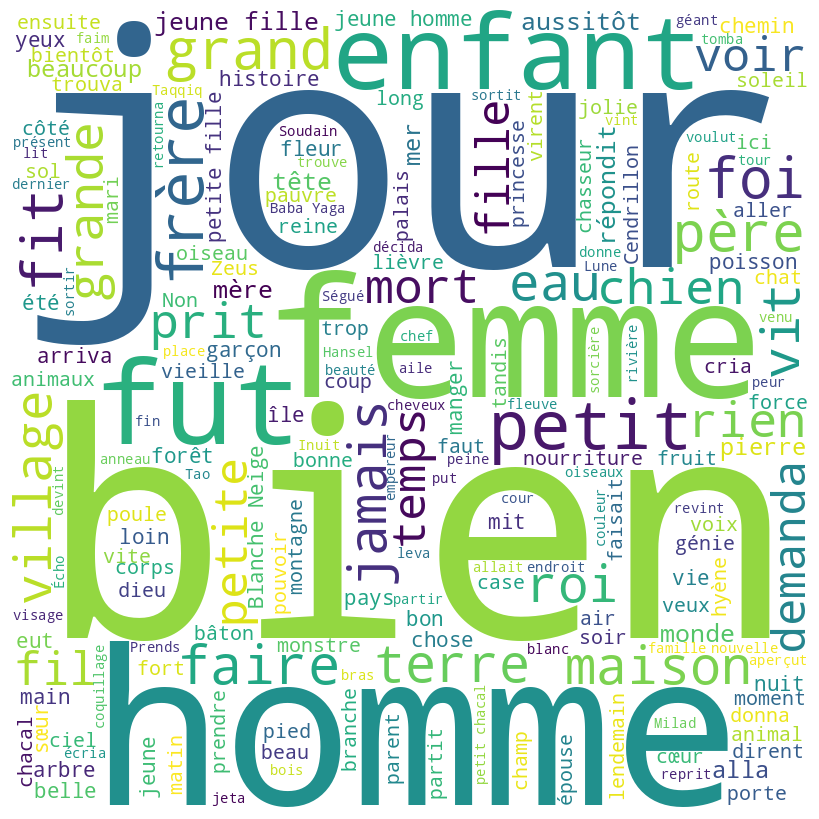

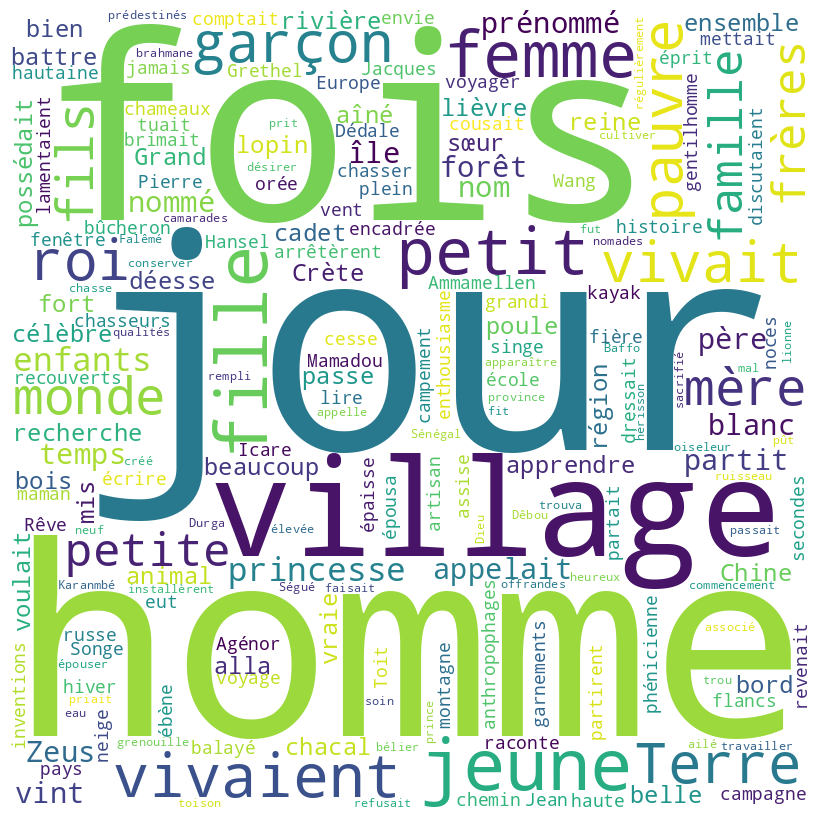

In [23]:
from wordcloud import WordCloud

# Charger le fichier CSV
df = pd.read_csv('../data/histoires_resumes.csv')

# Fonction pour extraire les mots, sans les stopwords, les chiffres et sans les ponctuations
def recup_words(text):
    doc = nlp(text)
    words = []
    for token in doc:
        if not token.is_stop and not token.is_punct and token.text.isalpha():
            words.append(token.text)    
    return words

# Appliquer la fonction sur les histoires et les résumés
# Assurez-vous que 'histoire' et 'resume' sont les noms corrects de vos colonnes
df['h_words'] = df['histoire'].apply(recup_words)
df['r_words'] = df['resumes'].apply(recup_words)

# Somme des mots
histoire_words_total = ' '.join(sum(df['h_words'], []))
resumes_words_total = ' '.join(sum(df['r_words'], []))

# Créer les nuages de mots
wordcloud_histoire = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(histoire_words_total)

wordcloud_resume = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(resumes_words_total)

# Plot the WordCloud images                    
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_histoire) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

#enregistrement nuage1
plt.savefig('../figures/nuage_mot_histoire.png')  
plt.show()

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_resume) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

#enregistrement nuage 2

plt.savefig('../figures/nuage_mot_resume.png')

plt.show()

In [10]:
!pip install textblob

In [26]:
# chargement du fichier CSV
df = pd.read_csv('../data/histoires_resumes.csv')

# fonction pour calculer les sentiments
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# appel de la fonction
df['histoire_sentiment'] = df['histoire'].apply(get_sentiment)
df['resume_sentiment'] = df['resumes'].apply(get_sentiment)

# affichage du DataFrame
df.head().to_csv('../figures/calcul_sentiments.csv', index=False)
print(df.head())

   id                                           histoire  \
0   1    Ammamellen avait une sœur et, toutes les foi...   
1   2    Un jeune homme du nom de Mamadou, qui voulai...   
2   3    Des hommes étaient en voyage. En chemin, ils...   
3   4    Dans un village de la campagne russe vivait ...   
4   5    Il était une fois une famille pauvre qui com...   

                                             resumes  histoire_sentiment  \
0  Ammamellen avait une sœur et, toutes les fois ...            0.162857   
1  Un jeune homme du nom de Mamadou, qui voulait ...            0.265208   
2  Des hommes étaient en voyage. En chemin, ils s...            0.150000   
3  Dans un village de la campagne russe vivait un...            0.284356   
4  Il était une fois une famille pauvre qui compt...            0.681380   

   resume_sentiment  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  


Plus le score de sentiment se rapproche de 0, plus il est négatif et plus il se rapproche de 1, plus il est positif.
Les résumés des histoires étant trop court, le calcul de sentiment ne renvoit donc pas de résultat exploitable pour faire une visualisation graphique intéressante.

sentiment_category
Négatif    45
Neutre     17
Positif    11
Name: count, dtype: int64


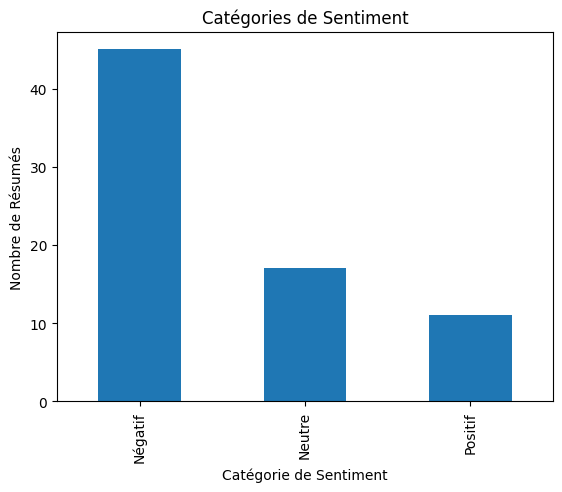

In [15]:
def categorize_sentiment(score):
    if score > 0.6:
        return 'Positif'
    elif score < 0.4:
        return 'Négatif'
    else:
        return 'Neutre'

df['sentiment_category'] = df['histoire_sentiment'].apply(categorize_sentiment)

# Compter le nombre d'histoires dans chaque catégorie
category_counts = df['sentiment_category'].value_counts()
print(category_counts)

# Visualisation des catégories de sentiment
category_counts.plot(kind='bar')
plt.title('Catégories de Sentiment')
plt.xlabel('Catégorie de Sentiment')
plt.ylabel('Nombre d\'histoires')
plt.show()

La visualisation des catégorie de sentiment permet de voir que les histoires racontées aux enfants ont tendance à être plus négatives. 